# 8月全球科技热点统计报告
数据来源：全球技术地图

----

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio
from wordcloud import WordCloud
import jieba
import jieba.analyse

jieba.analyse.set_idf_path("./dicts/idf.txt")

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

d = pd.read_csv('./1808/8yue_all.csv',sep='|',header=0)

d.describe()

,title,content,field,source,date,content_clean
count,352,352,352,352,352,352
unique,352,352,9,134,32,352
top,兰德公司发布《中国“一带一路”倡议：改善交通运输连通性对该地区贸易影响评估》报告,据新华网8月11日消息，南开大学陈永胜教授团队有机太阳能电池的研究获重大突破。该研究团队与中...,信息,EurekAlert网,8月13日,美国航空航天协会在犹他州立大学小卫星会议上提出，在立方星外安装一台小型低功率激光器，用于发送...
freq,1,1,70,29,21,1


In [2]:
field_stat = pd.DataFrame(d['field'].value_counts())
field_stat

,field
信息,70
生物,63
能源,52
科技战略,39
新材料,30
航空,28
海洋,25
航天,24
先进制造,21


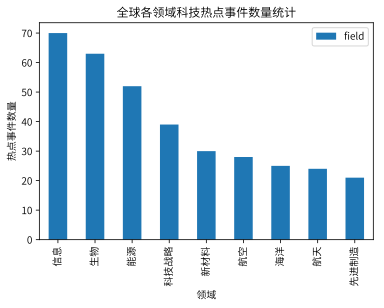

In [3]:
plt.rcParams['font.family'] = ['Source Han Sans CN']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

field_stat.plot(kind = 'bar', colormap='tab20')
plt.xlabel('领域')
plt.ylabel('热点事件数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

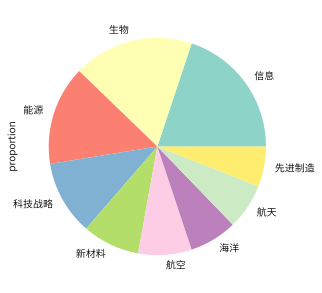

In [4]:
field_stat['proportion'] = field_stat['field'].map(lambda x: x/352)
field_stat
field_stat.plot(y='proportion',kind = 'pie',legend=False,figsize=(5,5),colormap='Set3')
# plt.xlabel('领域')
# plt.ylabel('热点事件数量')
# plt.title('全球各领域科技热点事件数量统计')
plt.show()

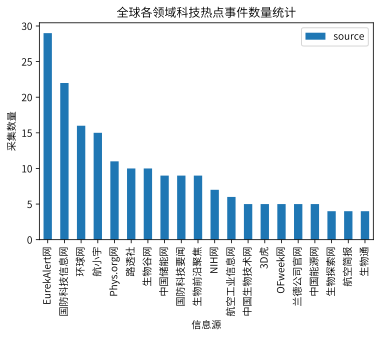

In [5]:
source_stat = pd.DataFrame(d['source'].value_counts())
source_stat[0:20].plot(kind = 'bar')
plt.xlabel('信息源')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

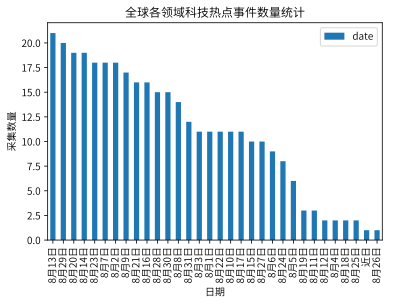

In [6]:
date_stat = pd.DataFrame(d['date'].value_counts())
date_stat.plot(kind = 'bar')
plt.xlabel('日期')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

## 1. 信息领域

-------

In [7]:
xx = d[d.field == '信息']
xx.describe()

,title,content,field,source,date,content_clean
count,70,70,70,70,70,70
unique,70,70,1,34,24,70
top,加拿大D-Wave公司量子计算研究取得进展,据Thenextweb网站8月23日消息，美国宇航局和英特尔开展合作，研究利用人工智能解决地...,信息,EurekAlert网,8月7日,华为因在设备中使用美国风河公司的过时软件，而使网络安全面临风险，正面临英国政府调查。负责华为...
freq,1,1,70,13,7,1


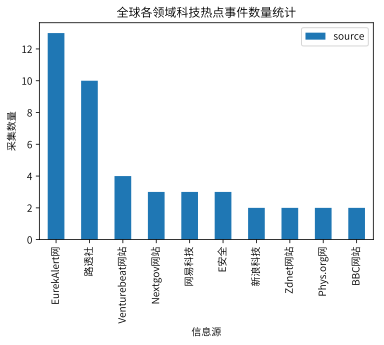

In [8]:
source_stat = pd.DataFrame(xx['source'].value_counts())
source_stat[0:10].plot(kind = 'bar')
plt.xlabel('信息源')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

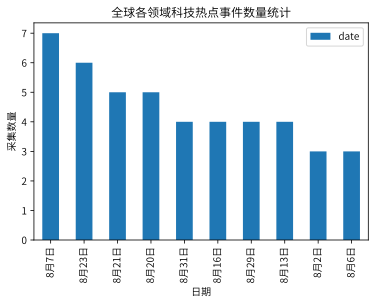

In [9]:
date_stat = pd.DataFrame(xx['date'].value_counts())
date_stat[:10].plot(kind = 'bar')
plt.xlabel('日期')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/m7/7lm92hx92zb89939mng3l23c0000gn/T/jieba.cache
Loading model cost 0.948 seconds.
Prefix dict has been built succesfully.


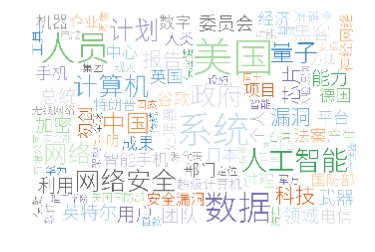

In [10]:
keywords_list = []
for i in xx['content_clean']:
    tags = jieba.analyse.extract_tags(i, topK=10, withWeight=False, allowPOS=('n','nr','ns','nz','nt'))
    for j in tags:
        keywords_list.append(j)
        
wclist = " ".join(keywords_list)
# print(wclist)
# def wordcount(wl):
#     # 文章字符串前期处理
#     count_dict = {}
#     # 如果字典里有该单词则加1，否则添加入字典
#     for str in wl:
#         if str in count_dict.keys():
#             count_dict[str] = count_dict[str] + 1
#         else:
#             count_dict[str] = 1
#     count_list=sorted(count_dict.items(),key=lambda x:x[1],reverse=True)
#     return count_list

# print(wordcount(keywords_list)[0:50])


# bg_pic = imageio.imread('./bg.jpeg')
wc = WordCloud(
    colormap='tab20c',
    background_color="white", #背景颜色
    font_path= "./font/syht.otf",  #字体用思源黑体
    max_words=100, #显示最大词数
    min_font_size=30,
    max_font_size=150, 
    width=1200,  #图幅宽度
    height=800   #词云高度
    )
wc.generate(wclist)
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('./1.png')

## 2. 生物领域

------

In [11]:
sw = d[d.field == '生物']
sw.describe()

,title,content,field,source,date,content_clean
count,63,63,63,63,63,63
unique,63,63,1,28,26,63
top,美国科学家发现肥胖会增加成人甲型流感的持续时间，或增加病毒传播的风险,据NIH网8月22日消息，美国斯坦福大学科学家通过老鼠实验发现激励、压力反应及情绪控制等方面...,生物,生物谷网,8月1日,美国放射学院内曼卫生政策研究所和乔治亚理工学院达成为期5年、价值300万美元的合作项目，将成...
freq,1,1,63,10,5,1


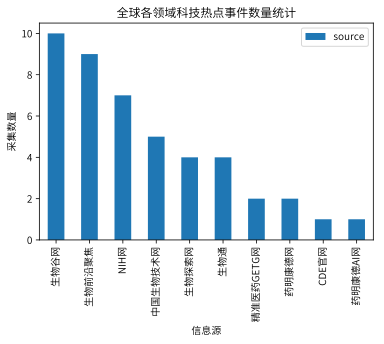

In [12]:
source_stat = pd.DataFrame(sw['source'].value_counts())
source_stat[0:10].plot(kind = 'bar')
plt.xlabel('信息源')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

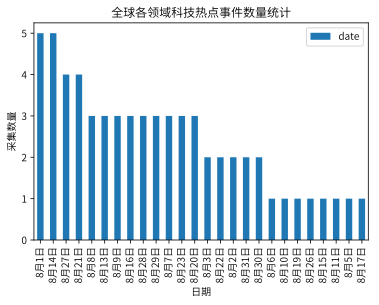

In [13]:
date_stat = pd.DataFrame(sw['date'].value_counts())
date_stat.plot(kind = 'bar')
plt.xlabel('日期')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

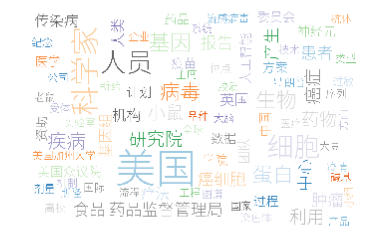

In [14]:
keywords_list = []
for i in sw['content_clean']:
    tags = jieba.analyse.extract_tags(i, topK=10, withWeight=False, allowPOS=('n','nr','ns','nz','nt'))
    for j in tags:
        keywords_list.append(j)
        
wclist = " ".join(keywords_list)
# print(wclist)
# def wordcount(wl):
#     # 文章字符串前期处理
#     count_dict = {}
#     # 如果字典里有该单词则加1，否则添加入字典
#     for str in wl:
#         if str in count_dict.keys():
#             count_dict[str] = count_dict[str] + 1
#         else:
#             count_dict[str] = 1
#     count_list=sorted(count_dict.items(),key=lambda x:x[1],reverse=True)
#     return count_list

# print(wordcount(keywords_list)[0:50])


# bg_pic = imageio.imread('./bg.jpeg')
wc = WordCloud(
    colormap='tab20c',
    background_color="white", #背景颜色
    font_path= "./font/syht.otf",  #字体用思源黑体
    max_words=100, #显示最大词数
    min_font_size=30,
    max_font_size=150, 
    width=1200,  #图幅宽度
    height=800   #词云高度
    )
wc.generate(wclist)
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('./2.png')

## 3. 能源领域

-------

In [15]:
ny = d[d.field == '能源']
ny.describe()

,title,content,field,source,date,content_clean
count,52,52,52,52,52,52
unique,52,52,1,19,23,52
top,美国密苏里科技大学开发出乏燃料观察和成像平台,据中国能源网8月8日消息，特斯拉首席执行官马斯克发表推文称，正考虑将特斯拉以每股420美元的...,能源,国防科技信息网,8月29日,吉林大学化学学院林海波团队在国际上率先用稻壳制备出高性价比的铅炭电池。相较于普通铅酸电池，该...
freq,1,1,52,12,6,1


In [16]:
source_stat = pd.DataFrame(ny['source'].value_counts())
source_stat[0:15].plot(kind = 'bar')
plt.xlabel('信息源')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

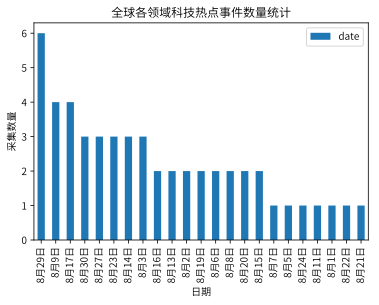

In [17]:
date_stat = pd.DataFrame(ny['date'].value_counts())
date_stat.plot(kind = 'bar')
plt.xlabel('日期')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

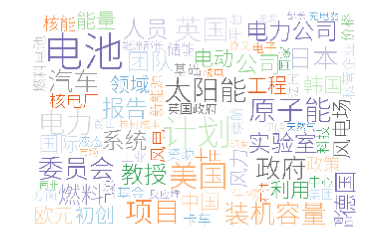

In [18]:
keywords_list = []
for i in ny['content_clean']:
    tags = jieba.analyse.extract_tags(i, topK=10, withWeight=False, allowPOS=('n','nr','ns','nz','nt'))
    for j in tags:
        keywords_list.append(j)
        
wclist = " ".join(keywords_list)

wc = WordCloud(
    colormap='tab20c',
    background_color="white", #背景颜色
    font_path= "./font/syht.otf",  #字体用思源黑体
    max_words=100, #显示最大词数
    min_font_size=30,
    max_font_size=150, 
    width=1200,  #图幅宽度
    height=800   #词云高度
    )
wc.generate(wclist)
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('./3.png')

## 4. 科技战略

----------

In [19]:
kj = d[d.field == '科技战略']
kj.describe()

,title,content,field,source,date,content_clean
count,39,39,39,39,39,39
unique,39,39,1,22,22,39
top,美国国际战略研究中心发布《美国的反恐战略及反恐战争趋势》报告,据机工情报8月2日消息，美国商务部产业与安全局（BIS）于当地时间8月1日公布了新修订的出口...,科技战略,兰德公司官网,8月2日,韩国企划财政部发布“2018-2022年国家财政运用计划”。按该计划，2020年韩国财政支出...
freq,1,1,39,5,6,1


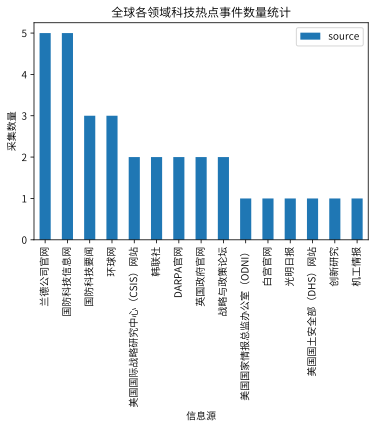

In [20]:
source_stat = pd.DataFrame(kj['source'].value_counts())
source_stat[0:15].plot(kind = 'bar')
plt.xlabel('信息源')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

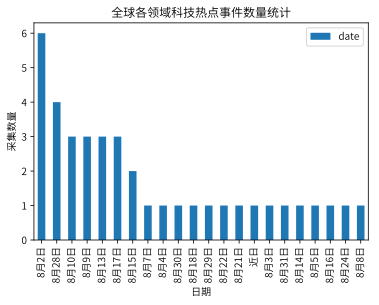

In [21]:
date_stat = pd.DataFrame(kj['date'].value_counts())
date_stat.plot(kind = 'bar')
plt.xlabel('日期')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

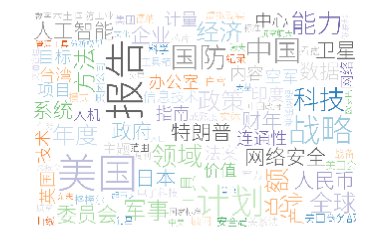

In [22]:
keywords_list = []
for i in kj['content_clean']:
    tags = jieba.analyse.extract_tags(i, topK=10, withWeight=False, allowPOS=('n','nr','ns','nz','nt'))
    for j in tags:
        keywords_list.append(j)
        
wclist = " ".join(keywords_list)

wc = WordCloud(
    colormap='tab20c',
    background_color="white", #背景颜色
    font_path= "./font/syht.otf",  #字体用思源黑体
    max_words=100, #显示最大词数
    min_font_size=30,
    max_font_size=150, 
    width=1200,  #图幅宽度
    height=800   #词云高度
    )
wc.generate(wclist)
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('./4.png')

## 5. 新材料领域

------

In [23]:
cl = d[d.field == '新材料']
cl.describe()

,title,content,field,source,date,content_clean
count,30,30,30,30,30,30
unique,30,30,1,9,17,30
top,麻省理工学院将光电二极管嵌入织物中，开发出可穿戴的通信系统,据AdvancedScienceNews网站8月30日消息，新加坡国立大学和英国布里斯托尔大...,新材料,EurekAlert网,8月28日,韩国汉阳大学通过控制电化学界面上的电位，抑制锂离子电池阳极上固体电解质中间相（SEI）膜的形...
freq,1,1,30,12,4,1


In [24]:
source_stat = pd.DataFrame(cl['source'].value_counts())
source_stat[0:15].plot(kind = 'bar')
plt.xlabel('信息源')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

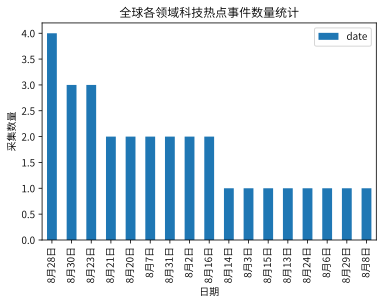

In [25]:
date_stat = pd.DataFrame(cl['date'].value_counts())
date_stat.plot(kind = 'bar')
plt.xlabel('日期')
plt.ylabel('采集数量')
plt.title('全球各领域科技热点事件数量统计')
plt.show()

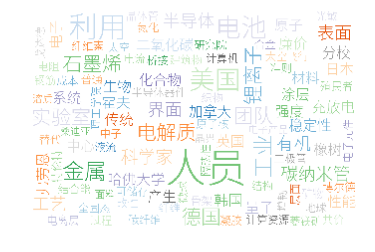

In [26]:
keywords_list = []
for i in cl['content_clean']:
    tags = jieba.analyse.extract_tags(i, topK=10, withWeight=False, allowPOS=('n','nr','ns','nz','nt'))
    for j in tags:
        keywords_list.append(j)
        
wclist = " ".join(keywords_list)

wc = WordCloud(
    colormap='tab20c',
    background_color="white", #背景颜色
    font_path= "./font/syht.otf",  #字体用思源黑体
    max_words=100, #显示最大词数
    min_font_size=30,
    max_font_size=150, 
    width=1200,  #图幅宽度
    height=800   #词云高度
    )
wc.generate(wclist)
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('./4.png')